# Phase angle photometry fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.testing import assert_array_equal, assert_array_almost_equal

from ssi.geol import EUROPA

In [2]:
def fname(img):
    """Get CSV filename from image id.
    
    Parameters
    ----------
    img: str
        Image name.
        
    Returns
    -------
    str:
        CSV filename.

    """
    return f'{img}_cal.pho.csv'


assert fname('C0413743200R') == 'C0413743200R_cal.pho.csv'
assert fname('C0413743222R') == 'C0413743222R_cal.pho.csv'

In [3]:
def get_col(param):
    """Get the column index in csv file.
    
    Parameters
    ----------
    param: str
        Photometric parameter name.
        
    Returns
    -------
    int:
        Column index.

    """
    return ['unit', 'B0', 'dB0', 'k', 'dk', 'A', 'dA', 'f_alpha', 'df_alpha'].index(param)

    
assert get_col('unit') == 0
assert get_col('B0') == 1
assert get_col('dB0') == 2
assert get_col('k') == 3
assert get_col('dk') == 4
assert get_col('A') == 5
assert get_col('dA') == 6
assert get_col('f_alpha') == 7
assert get_col('df_alpha') == 8

In [4]:
def get_values_1(fname, col):
    """Get data of a column from a csv file.
    
    Parameters
    ----------
    fname: str
        CSV filename.
    col: int
        Column index to extract.

    Returns
    -------
    list:
        Values of the column.
        
    See also
    --------
    numpy.loadtxt
    
    """
    return np.loadtxt(fname, usecols=col, delimiter=', ')


# All B0 values of C0413743200R
B0 = get_values_1('C0413743200R_cal.pho.csv', 1)

assert_array_equal(B0, [0.3815, 0.3772, 0.3322, 0.3758, 0.4685, 0.4558])


# All f_alpha values of C0413743200R
f_alpha = get_values_1('C0413743200R_cal.pho.csv', 7)

assert_array_equal(f_alpha, [0.7267, 0.6771, 0.6395, 0.6901, 0.5657, 0.7101])

AssertionError: 
Arrays are not equal

Mismatch: 100%
Max absolute difference: 0.0682
Max relative difference: 0.14962703
 x: array([0.3965, 0.3752, 0.3388, 0.3773, 0.4646, 0.524 ])
 y: array([0.3815, 0.3772, 0.3322, 0.3758, 0.4685, 0.4558])

In [5]:
def get_values_2(img, param):
    """Get parameter values for an image.
    
    Parameters
    ----------
    img: str
        Image name.
    param: str
        Photometric parameter name.

    Returns
    -------
    list:
        Parameter values.

    See Also
    --------
    fname
    get_col
    numpy.loadtxt
    
    """
    return np.loadtxt(fname(img), usecols=get_col(param), delimiter=', ')


# All B0 values of C0413743200R
B0 = get_values_2('C0413743200R', 'B0')

assert_array_equal(B0, [0.3815, 0.3772, 0.3322, 0.3758, 0.4685, 0.4558])

# All f_alpha values of C0413743200R
f_alpha = get_values_2('C0413743200R', 'f_alpha')

assert_array_equal(f_alpha, [0.7267, 0.6771, 0.6395, 0.6901, 0.5657, 0.7101])

AssertionError: 
Arrays are not equal

Mismatch: 100%
Max absolute difference: 0.0682
Max relative difference: 0.14962703
 x: array([0.3965, 0.3752, 0.3388, 0.3773, 0.4646, 0.524 ])
 y: array([0.3815, 0.3772, 0.3322, 0.3758, 0.4685, 0.4558])

In [6]:
def get_values_3(img, param):
    """Get units and parameter values for an image.
    
    Parameters
    ----------
   img: str
        Image name.
    param: str
        Photometric parameter name.

    Returns
    -------
    list:
        List of units in the file.
    list:
        Parameter values.
        
    See Also
    --------
    fname
    get_col
    numpy.loadtxt
    numpy.dtype
    
    """
    units = np.loadtxt(fname(img), usecols=get_col('unit'), delimiter=',', dtype=str)
    values = np.loadtxt(fname(img), usecols=get_col(param), delimiter=',')
    
    return units, values


# Get units and B0 values from C0413743200R
units, B0 = get_values_3('C0413743200R', 'B0')

assert_array_equal(units, ['Ridged plains', 'Bands', 'Low albedo chaos', 'Molted albedo chaos', 'Knobby albedo chaos', 'High albedo chaos'])
assert_array_equal(B0, [0.3815, 0.3772, 0.3322, 0.3758, 0.4685, 0.4558])


# Get units and f_alpha values from C0413743200R
units, f_alpha = get_values_3('C0413743200R', 'f_alpha')

assert_array_equal(units, ['Ridged plains', 'Bands', 'Low albedo chaos', 'Molted albedo chaos', 'Knobby albedo chaos', 'High albedo chaos'])
assert_array_equal(f_alpha, [0.7267, 0.6771, 0.6395, 0.6901, 0.5657, 0.7101])

AssertionError: 
Arrays are not equal

Mismatch: 16.7%
 x: array(['Ridged plains', 'Bands', 'Low albedo chaos',
       'Mottled albedo chaos', 'Knobby albedo chaos', 'High albedo chaos'],
      dtype='<U20')
 y: array(['Ridged plains', 'Bands', 'Low albedo chaos',
       'Molted albedo chaos', 'Knobby albedo chaos', 'High albedo chaos'],
      dtype='<U19')

In [7]:
def get_data_1(img, param, unit):
    """Get parameter value for an image and a single unit.
    
    Parameters
    ----------
   img: str
        Image name.
    param: str
        Photometric parameter name.
    unit: str
        Unit name.

    Returns
    -------
    float or None:
        Photometric value for the selected unit.
    
    See Also
    --------
    get_values_3
    
    """
    units, values = get_values_3(img, param)
    for u, v in zip(units, values):
        if u == unit:
            return v

assert get_data_1('C0413743200R', 'B0', 'Ridged plains') == 0.3815
assert get_data_1('C0413743200R', 'dB0', 'Ridged plains') == 0.0010
assert get_data_1('C0413743200R', 'A', 'Bands') == 0.8832
assert get_data_1('C0413743200R', 'dA', 'Bands') == 0.0142
assert get_data_1('C0413743200R', 'B0', 'Crater') is None

AssertionError: 

In [18]:
def get_data_2(imgs, param, unit):
    """Get all parameter values for a list of images on a single unit.
    
    Parameters
    ----------
   imgs: list
        List of images.
    param: str
        Photometric parameter name.
    unit: str
        Unit name.

    Returns
    -------
    list:
        Photometric values for the selected unit.
    
    See Also
    --------
    get_data_1
    
    """
    return [get_data_1(img, param, unit) for img in imgs]


imgs = [
#     'C0413743200R',
#     'C0413743222R',
#     imgs = [
   # 'C0413743222R',
   # 'C0413743200R',
   # 'C2059319',  #Violet
   # 'C2065145',   #Violet
   # 'C0401727726R_cal', #Violet
   # 'C0413743200R_cal', #Violet
   # 'C0639063413R_cal', #Violet
   # 'C0360063913R_cal',  # Violet
    'C2060513',                 #phase 10
    'C2065213',                 #phase 107
    'C2065221',                 #phase 108
    'lor_0034735439_0x630_sci', #phase 20
    'lor_0034866662_0x630_sci', #phase 35
    'lor_0034823099_0x630_sci', #phase 22
    'lor_0034930319_0x630_sci', #phase 69
    'lor_0034931999_0x630_sci', #phase 71
#    'lor_0034975919_0x630_sci',  #phase 100 Odd values can be removed
    'lor_0035025959_0x630_sci',  #phase 128
    '5126r_cal',                 #phase 38
    'C0374649026R',              #phase  75
    'C0349875100R',             #phase  83
    'C0368639400R',             #phase 65
    'C0349875113R',             #phase 37
    'C0374649000R',             #phase 56
    'C0374649013R',             #phase   56       
   'C0374649026R',              #phase 55
    'C0383694600R',             #phase 37
#    'C0383717539R',
    'C2065022',                 #phase 94
    'C2065016',                 #phase 107
    'C2065219',                 #phase 108
 
]
# ]

assert_array_equal(get_data_2(imgs, 'B0', 'Ridged plains'), [0.3815, 0.7038])
assert_array_equal(get_data_2(imgs, 'B0', 'Crater'), [None, 0.7538])

OSError: C2060513_cal.pho.csv not found.

In [19]:
def get_phase_1(fname):
    """Get phase angle from a CSV file.
    
    Parameters
    ----------
    fname: str
        CSV filename.

    Returns
    -------
    float:
        Image phase angle (deg).

    See Also
    --------
    readlines
    split
    
    """
    with open(fname) as f:
        lines = f.readlines()
        
    for line in lines:
        if '#' in line and 'phase' in line:
            return float(line.split(',')[1])

    
assert get_phase_1('C0413743200R_cal.pho.csv') == 27
assert get_phase_1('C0413743222R_cal.pho.csv') == 27

In [20]:
def get_phase_2(img):
    """Get phase angle of an image.
    
    Parameters
    ----------
    img: str
        Image name.

    Returns
    -------
    float:
        Image phase angle (deg).

    See Also
    --------
    fname
    readlines
    split

    """
    with open(fname(img)) as f:
        lines = f.readlines()
        
    for line in lines:
        if '#' in line and 'phase' in line:
            return float(line.split(',')[1])

    
assert get_phase_2('C0413743200R') == 27
assert get_phase_2('C0413743222R') == 27

In [21]:
def get_phase_3(imgs):
    """Get phase angles for a list of images.
    
    Parameters
    ----------
    imgs: str
        List of images.

    Returns
    -------
    list:
        List of image phase angles (deg).

    See Also
    --------
    get_phase_2
    
    """
    return [get_phase_2(img) for img in imgs]


imgs = [
    'C0413743200R',
    'C0413743222R',
]

assert_array_equal(get_phase_3(imgs), [27, 27])

In [22]:
def get_data_3(imgs, param, unit):
    """Get X-Y data for a parameter and unit on a list of images.
    
    Parameters
    ----------
   imgs: list
        List of images.
    param: str
        Photometric parameter name.
    unit: str
        Unit name.

    Returns
    -------
    list:
        List of image phase angles (deg).
    list:
        Photometric values for the selected unit.

    See Also
    --------
    get_phase_3
    get_data_2

    """
    return get_phase_3(imgs), get_data_2(imgs, param, unit)
    

phases, B0 = get_data_3(imgs, 'B0', 'Ridged plains')

assert_array_equal(phases, [27, 27])
assert_array_equal(B0, [0.3815, 0.7038])

AssertionError: 
Arrays are not equal

Mismatch: 50%
Max absolute difference: 0.015
Max relative difference: 0.03931848
 x: array([0.3965, 0.7038])
 y: array([0.3815, 0.7038])

In [23]:
# Cheat phase angles to be able to make a linear fit with distinct x values
phases = [10, 20]

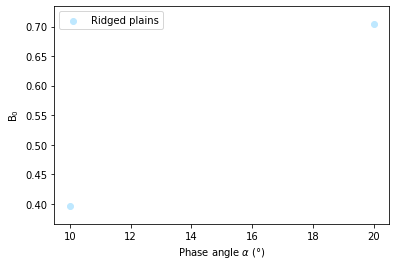

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(phases, B0, color=EUROPA.color('Ridged plains'), label='Ridged plains')

ax.set_xlabel(r'Phase angle $\alpha$ (°)')
ax.set_ylabel(r'B$_0$')

ax.legend();

In [25]:
def linear_fit_1(phases, values):
    """Get parameter from a linear.
    
    values = m * phases + b
    
    Parameters
    ----------
    phases: list
        List of phase angles.
    values: list
        Photometric parameter values.
    
    Returns
    -------
    flaot, float:
        `m` and `b` linear paramters.
        
    """
    return np.polyfit(phases, values, 1)

m, b = linear_fit_1(phases, B0)

assert_array_almost_equal([m, b], [0.03223, 0.0592], decimal=4)

AssertionError: 
Arrays are not almost equal to 4 decimals

Mismatch: 100%
Max absolute difference: 0.03
Max relative difference: 0.50675676
 x: array([0.0307, 0.0892])
 y: array([0.0322, 0.0592])

In [26]:
def linear_fit_2(phases, values):
    """Get parameter from a linear.
    
    values = m * phases + b
    
    Parameters
    ----------
    phases: list
        List of phase angles.
    values: list
        Photometric parameter values.
    
    Returns
    -------
    flaot, float:
        `m` and `b` linear paramters.
        
    See Also
    --------
    linear_fit_1
    
    """
    xmin, xmax = np.min(phases), np.max(phases)
    
    m, b = linear_fit_1(phases, values)
    
    return [xmin, xmax], [m * xmin + b, m * xmax + b]

x, y = linear_fit_2(phases, B0)

assert_array_equal(x, [10, 20])
assert_array_almost_equal(y, [0.3815, 0.7038], decimal=4)

AssertionError: 
Arrays are not almost equal to 4 decimals

Mismatch: 50%
Max absolute difference: 0.015
Max relative difference: 0.03931848
 x: array([0.3965, 0.7038])
 y: array([0.3815, 0.7038])

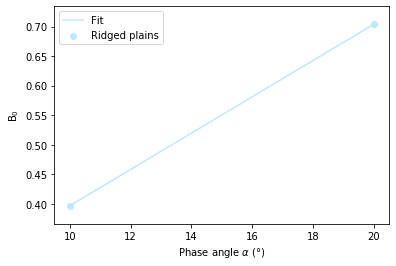

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(phases, B0, color=EUROPA.color('Ridged plains'), label='Ridged plains')

ax.plot(*linear_fit_2(phases, B0), color=EUROPA.color('Ridged plains'), label='Fit')

ax.set_xlabel(r'Phase angle $\alpha$ (°)')
ax.set_ylabel(r'B$_0$')

ax.legend();